<center><h2><font color="midnightblue">Building a Credit Risk Analyzer</font></h2></center>

### 1. Objective
<font color="#913716"><b><blockquote>This project aims to build a Binary Classification model that predicts whether a person will default on returning a particular loan amount or not based on certain independent variables such as age, education, income, gender etc. This helps banks to perform credit risk analysis i.e. possibility of the borrower's repayment failure and the loss incurred by the financer when the borrower does not for any reason repay the contractual loan amount.</blockquote></b></font>

### 2. Importing the required Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,confusion_matrix
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')
import numpy as np

### 3. Loading the data

In [3]:
data = pd.read_csv("credit_data.csv")
data.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


### 4. Exploratory Data Analysis

#### 4.1 Columns in the dataset

In [4]:
data.columns

Index(['age', 'gender', 'education', 'occupation', 'organization_type',
       'seniority', 'annual_income', 'disposable_income', 'house_type',
       'vehicle_type', 'marital_status', 'no_card', 'default'],
      dtype='object')

#### 4.2 Information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                50636 non-null  int64 
 1   gender             50636 non-null  object
 2   education          50636 non-null  object
 3   occupation         50636 non-null  object
 4   organization_type  50636 non-null  object
 5   seniority          50636 non-null  object
 6   annual_income      50636 non-null  int64 
 7   disposable_income  50636 non-null  int64 
 8   house_type         50636 non-null  object
 9   vehicle_type       50636 non-null  object
 10  marital_status     50636 non-null  object
 11  no_card            50636 non-null  int64 
 12  default            50636 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 5.0+ MB


<blockquote style="font-size:15px"><font color="#116629">
    <p>Some observations about the dataset are:
    <ul>
        <li>There are 3 continuous variables and 9 categorical variables</li>
        <li>There are no null entries in the dataset</li>
        <li>There are 50,636 entries in the dataset</li>
    </ul>
</font></blockquote>

#### 4.3 Descriptive statistics of the dataset

In [6]:
data.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


#### 4.4 Unique values in the dataset

In [7]:
print(data.nunique())

age                     47
gender                   2
education                4
occupation               4
organization_type        4
seniority                6
annual_income        48108
disposable_income    28415
house_type               4
vehicle_type             3
marital_status           3
no_card                  3
default                  2
dtype: int64


In [8]:
print("Gender : ",data.gender.unique())
print("Education : ",data.education.unique())
print("Occupation : ",data.occupation.unique())
print("Organization Type : ",data.organization_type.unique())
print("Seniority : ",data.seniority.unique())
print("House Type : ",data.house_type.unique())
print("Vehicle Type : ",data.vehicle_type.unique())
print("Marital Status : ",data.marital_status.unique())

Gender :  ['Male' 'Female']
Education :  ['Graduate' 'Under Graduate' 'Post Graduate' 'Other']
Occupation :  ['Professional' 'Salaried' 'Student' 'Business']
Organization Type :  ['None' 'Tier 3' 'Tier 2' 'Tier 1']
Seniority :  ['None' 'Entry' 'Mid-level 1' 'Junior' 'Mid-level 2' 'Senior']
House Type :  ['Family' 'Rented' 'Company provided' 'Owned']
Vehicle Type :  ['None' 'Two Wheeler' 'Four Wheeler']
Marital Status :  ['Married' 'Single' 'Other']


#### 4.5 Univariate analysis - Age of persons

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

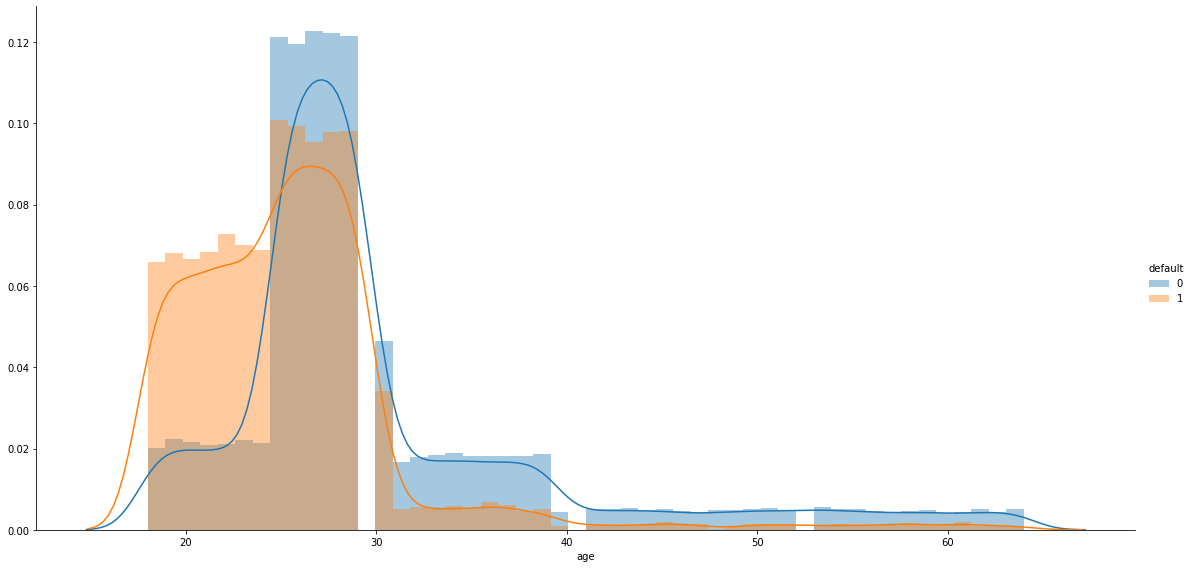

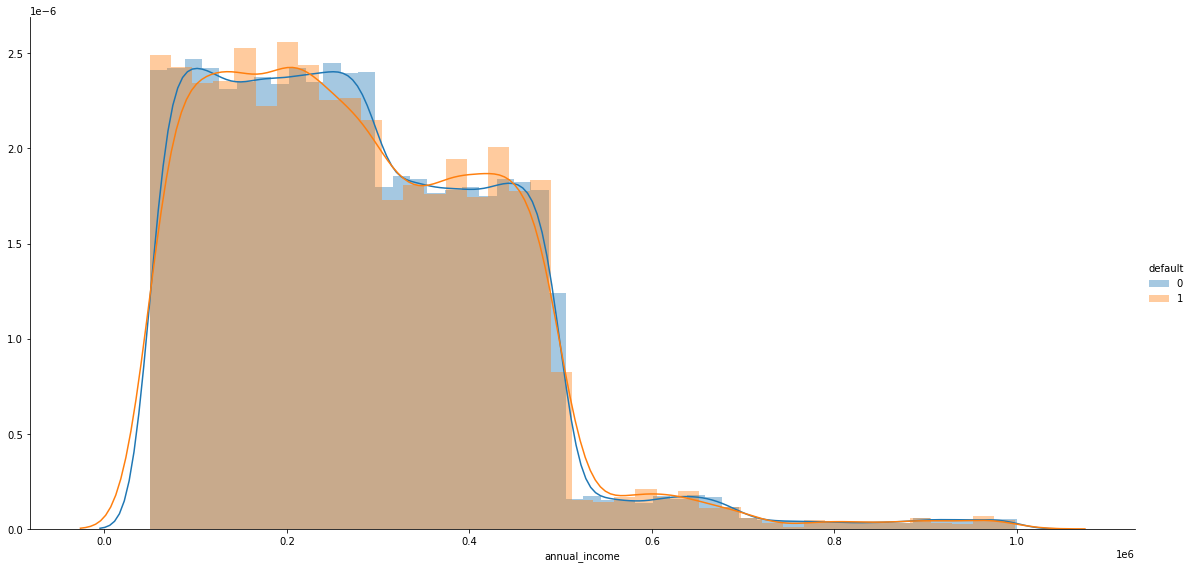

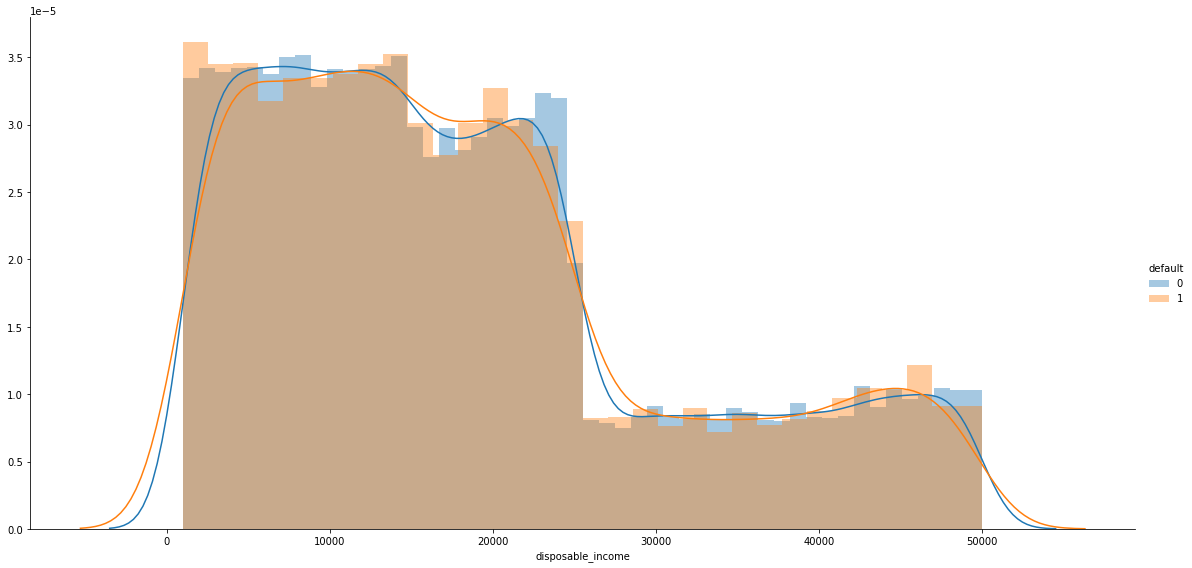

In [9]:
for var in ['age','annual_income','disposable_income']:
    sns.FacetGrid(data,hue="default",height=8,aspect=2).map(sns.distplot,var).add_legend()

In [10]:
data['age'].value_counts()

28    5514
27    5512
25    5502
29    5491
26    5423
30    2073
23    1383
19    1374
22    1360
24    1349
20    1336
21    1325
18    1279
34     780
39     764
33     761
36     758
37     757
35     750
32     745
38     745
31     690
53     229
43     220
45     217
51     216
41     210
54     209
50     207
55     206
64     205
42     204
62     202
44     202
59     199
52     199
49     197
58     196
56     194
46     189
61     188
48     188
57     184
63     181
40     178
47     174
60     171
Name: age, dtype: int64

#### 4.6 Univariate Analysis - All categorical variables count vs defaulter count category wise

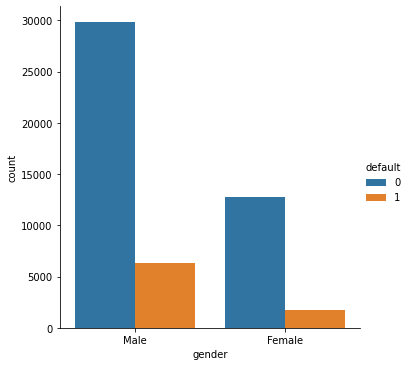

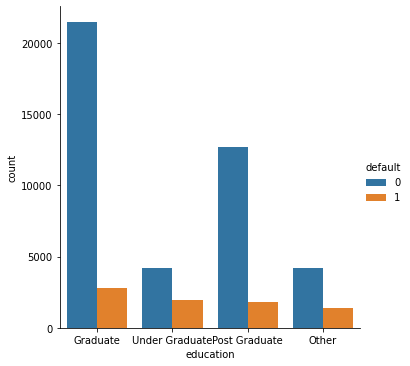

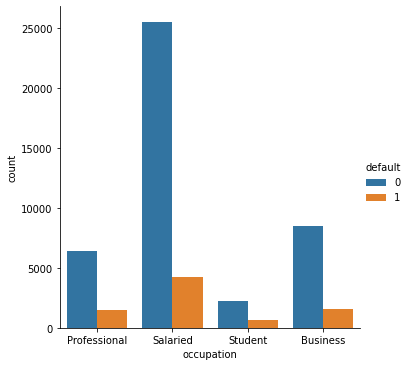

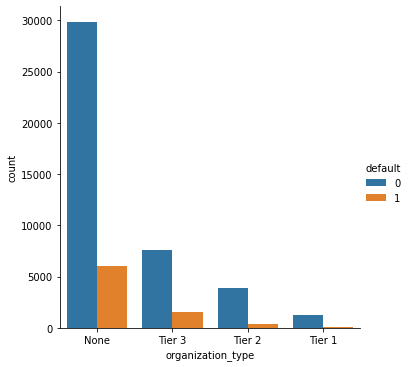

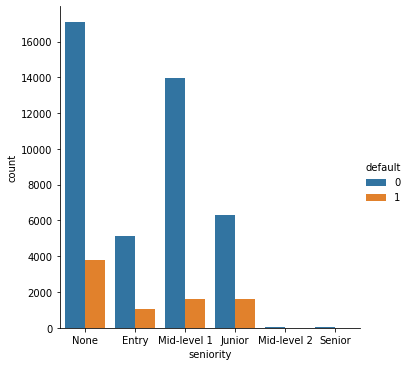

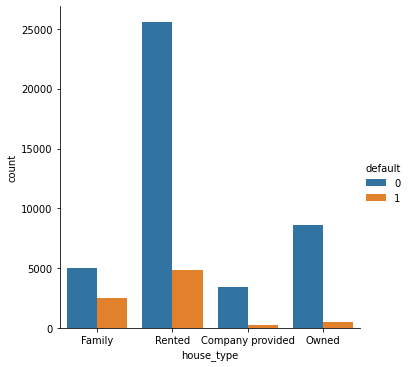

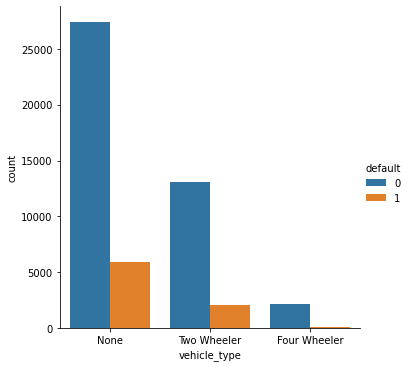

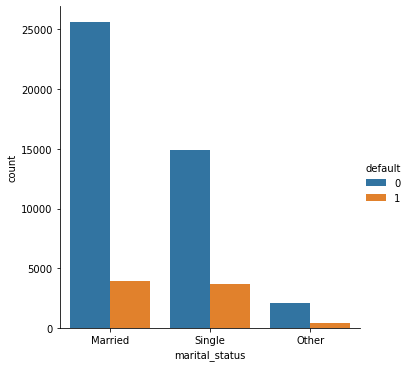

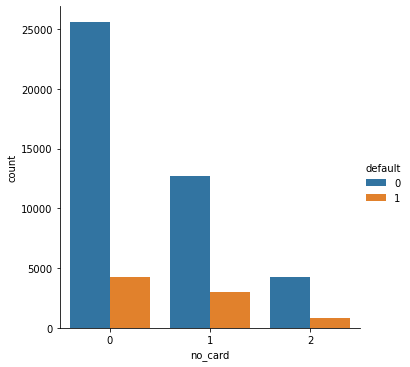

In [11]:
for var in ['gender', 'education', 'occupation', 'organization_type', 'seniority', 'house_type','vehicle_type', 'marital_status', 'no_card']:
    sns.catplot(x=var,hue="default",kind="count",data=data)

In [12]:
for var in ['gender', 'education', 'occupation', 'organization_type', 'seniority', 'house_type','vehicle_type', 'marital_status', 'no_card']:
    print(data[var].value_counts())
    print("\n")

Male      36187
Female    14449
Name: gender, dtype: int64


Graduate          24320
Post Graduate     14545
Under Graduate     6189
Other              5582
Name: education, dtype: int64


Salaried        29738
Business        10072
Professional     7942
Student          2884
Name: occupation, dtype: int64


None      35884
Tier 3     9165
Tier 2     4226
Tier 1     1361
Name: organization_type, dtype: int64


None           20898
Mid-level 1    15565
Junior          7934
Entry           6136
Mid-level 2       60
Senior            43
Name: seniority, dtype: int64


Rented              30411
Owned                9077
Family               7506
Company provided     3642
Name: house_type, dtype: int64


None            33301
Two Wheeler     15101
Four Wheeler     2234
Name: vehicle_type, dtype: int64


Married    29539
Single     18576
Other       2521
Name: marital_status, dtype: int64


0    29855
1    15747
2     5034
Name: no_card, dtype: int64




### 5. Model Building

#### 5.1 Analyzing the imbalance of the dataset

Points with class label -> 0 are =   84.15751639150012 %
Points with class label -> 1 are =   15.842483608499883 %


([<matplotlib.patches.Wedge at 0x26f82e29bb0>,
 [Text(-0.9715353121196196, 0.5158673640623465, '0'),
  Text(0.9715352879701245, -0.5158674095431959, '1')],
 [Text(-0.529928352065247, 0.2813821985794617, '84.5%'),
  Text(0.5299283388927951, -0.2813822233871977, '15.5%')])

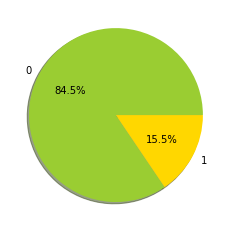

In [13]:
class_label = data['default'].value_counts()
total_points = len(data)
print("Points with class label -> 0 are =  ",class_label.values[0]/total_points*100,"%")
print("Points with class label -> 1 are =  ",class_label.values[1]/total_points*100,"%")
labels = ['0','1']
sizes = [84.15,15.48]
colors = ['yellowgreen', 'gold']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

<blockquote style="font-size:18px;color:blue;">
    <ul type="none">
    <li>The given dataset is imbalanced. Because there are 84% of points with class label '0' and just only ~16% of the points with the class label '1'.</li>
    </ul>
</blockquote>

#### 5.2 Making necessary assumption and changes
<blockquote style="font-size:16px;color:indigo;">
    <ul type="none">
    <li>As the data in here is imbalanced, the decision trees may not perform as well as expected.</li>
    <li>We can use undersampling or oversampling to avoid the above problem. Otherwise there is a possibility that we may overfit the training data which will result in high generalization error.</li>
        <li>In order to get a good accuracy and as well as "less generalization error" we could perform cross validation on various hyperparamaters.</li>
        <li>Alternatively we can use Randomforests with decision trees as base learners if we want to improve our models prediction accuracy.</li>
    </ul>
</blockquote>

#### 5.3 Splitting the data into test,cv  and train data sets

<blockquote style="font-size:16px;color:#333;">
    <ul type="none">
    <li>If we train the model on the entire dataset we would not know how well is our model performing. And also how well the model generalizes to the unseen data.</li>
    <li>So we make a split of data into train and test sets. Then train the model on the train set and then evaluate the model on the test set.</li>
        <li>In this project we are choosing the raio of train:test split as 70% : 30%.</li>
    </ul>
</blockquote>

#### 5.4 Encoding the categorical attrbutes in the dataset

In [14]:
cleanup_nums = {"gender":{"Male": 0, "Female": 1},
                "education": {"Graduate": 0, "Post Graduate": 1, "Under Graduate": 2, "Other": 3},
                "occupation": {"Salaried":0,"Business":1,"Professional":2,"Student":3},
                "organization_type": {"None":0,"Tier 3":3,"Tier 1":1,"Tier 2":2},
                "seniority":{"None":0,"Mid-level 1":1,"Junior":2,"Entry":3,"Mid-level 2":4,"Senior":5},
                "house_type":{"Rented":0,"Owned":1,"Family":2,"Company provided":3},
                "vehicle_type":{"None":0,"Two Wheeler":1,"Four Wheeler":2},
                "marital_status":{"Married":0,"Single":1,"Other":2}}

In [15]:
data = data.replace(cleanup_nums)
data.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,0,0,2,0,0,186319,21625,2,0,0,0,1
1,18,0,2,2,0,0,277022,20442,0,0,0,0,1
2,29,0,2,0,0,3,348676,24404,0,0,0,1,1
3,18,0,0,3,0,0,165041,2533,0,0,0,0,1
4,26,0,1,0,0,1,348745,19321,0,0,0,1,1


#### 5.5 Splitting the data into train and test sets

In [18]:
y = data['default']
X = data.drop(['default'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
X_train_train, X_cv, y_train_train, y_cv = train_test_split(X_train, y_train, test_size=0.3,stratify=y_train)
print("Dimensionality of X_train and y_train :")
print(X_train.values.shape ,y_train.values.shape)
print("Dimensionality of X_train_train and y_train_train :")
print(X_train_train.values.shape ,y_train_train.values.shape)
print("Dimensionality of X_test and y_test :")
print(X_test.values.shape ,y_test.values.shape)
print("Dimensionality of X_cv and y_cv :")
print(X_cv.values.shape ,y_cv.values.shape)

Dimensionality of X_train and y_train :
(35445, 12) (35445,)
Dimensionality of X_train_train and y_train_train :
(24811, 12) (24811,)
Dimensionality of X_test and y_test :
(15191, 12) (15191,)
Dimensionality of X_cv and y_cv :
(10634, 12) (10634,)


#### 5.6 Scaling the continuous variables

In [26]:
for var in ['age','annual_income','disposable_income']:
    sc = StandardScaler()
    sc.fit(X_train[var].values.reshape(-1,1))
    temp = sc.transform(X_train[var].values.reshape(-1,1))
    X_train[var] = deepcopy(temp)
    temp = sc.transform(X_test[var].values.reshape(-1,1))
    X_test[var] = deepcopy(temp)
    temp = sc.transform(X_cv[var].values.reshape(-1,1))
    X_cv[var] = deepcopy(temp)

#### 5.7 Grid Search CV for cross validation

In [35]:
params = {'max_depth': np.arange(3, 10),'criterion' :['gini', 'entropy']}
dt = DecisionTreeClassifier()
best_model = GridSearchCV(dt, params)
best_model.fit(X_train,y_train)
y_pred_cv = best_model.predict_proba(X_cv)[:, 1]
auc_score = roc_auc_score(y_cv, y_pred_cv)

In [36]:
print("The AUC on cross validation set is :",auc_score)

The AUC on cross validation set is : 0.7858506479015774


#### 5.8 Finding the best hyperparameters

In [38]:
best_model.best_params_

{'criterion': 'entropy', 'max_depth': 6}

#### 5.9 Training the model with the best hyperparameters

In [39]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6)
dt.fit(X_train,y_train)
y_pred_train = dt.predict_proba(X_train)[:,1]
y_pred_test = dt.predict_proba(X_test)[:,1]

#### 5.10 Train,Test accuracy

In [40]:
print("Train accuracy is :",dt.score(X_train,y_train)*100)
print("Test accuracy is  :",dt.score(X_test,y_test)*100)
print("CV accuracy is  :",dt.score(X_cv,y_cv)*100)

Train accuracy is : 86.4296797855833
Test accuracy is  : 86.14311105259694
CV accuracy is  : 86.3832988527365
